In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#https://www.kaggle.com/datasets/lodetomasi1995/income-classification

In [3]:
df = pd.read_csv('14-income_evaluation.csv')

In [4]:
# EDA & Preparing the Data

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [8]:
df[" income"].value_counts()

 income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [9]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [10]:
col_names = ["age", "workclass", "finalweight", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex",
             "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [11]:
df.columns = col_names

In [12]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df.describe()

,age,finalweight,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [16]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]

In [17]:
## Feature Separation

# We separated the features into two groups:  
# Categorical: columns with object (string) data type  
# Numerical: columns with numerical data type

In [18]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [19]:
numerical

['age',
 'finalweight',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [20]:
df[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [21]:
for col in categorical:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

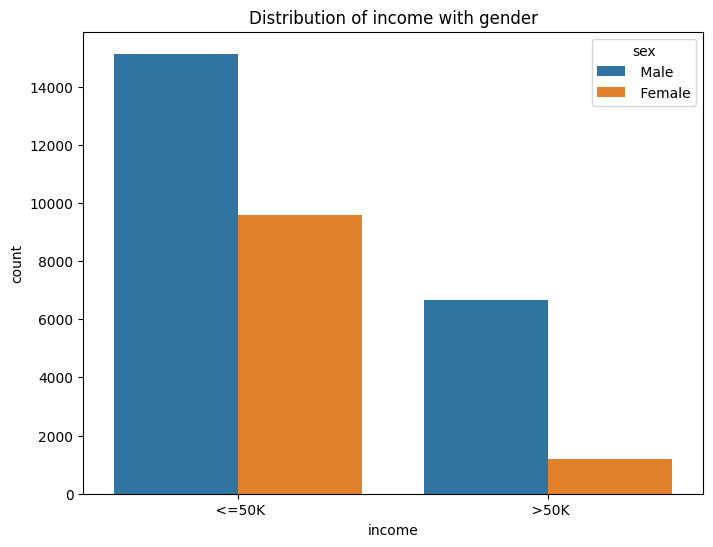

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="income", hue="sex", data=df)
ax.set_title("Distribution of income with gender")
plt.show()

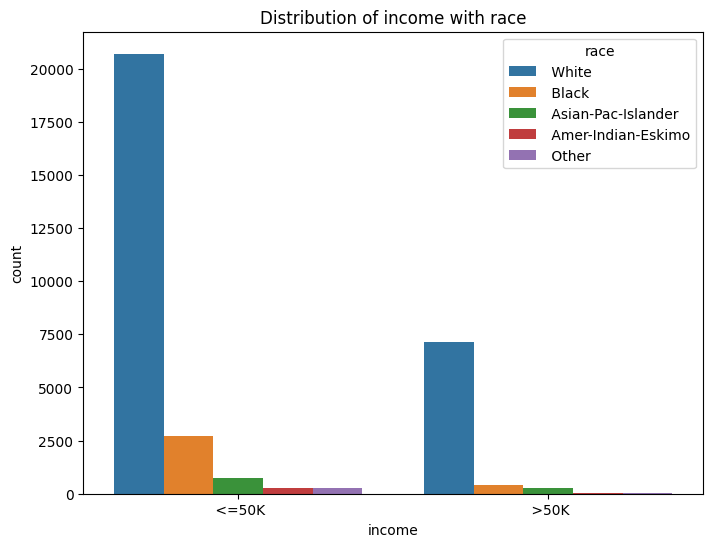

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="income", hue="race", data=df)
ax.set_title("Distribution of income with race")
plt.show()

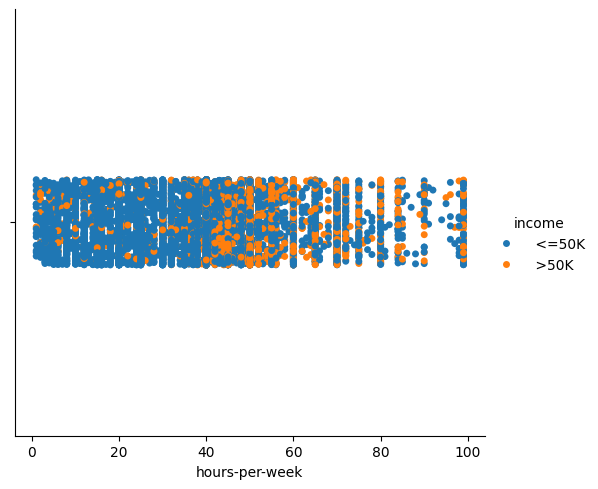

In [24]:
sns.catplot(x=df["hours-per-week"], hue=df["income"])
plt.show()

In [25]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [26]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [27]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [28]:
df["workclass"] = df["workclass"].replace(" ?", np.nan)

In [29]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [30]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [31]:
df["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [32]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [33]:
df["occupation"] = df["occupation"].replace(" ?", np.nan)

In [34]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [35]:
df["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [36]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [37]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [38]:
df["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [39]:
df["native-country"] = df["native-country"].replace(" ?", np.nan)

In [40]:
df["native-country"].value_counts()

native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [41]:
df.isnull().sum()

age                  0
workclass         1836
finalweight          0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

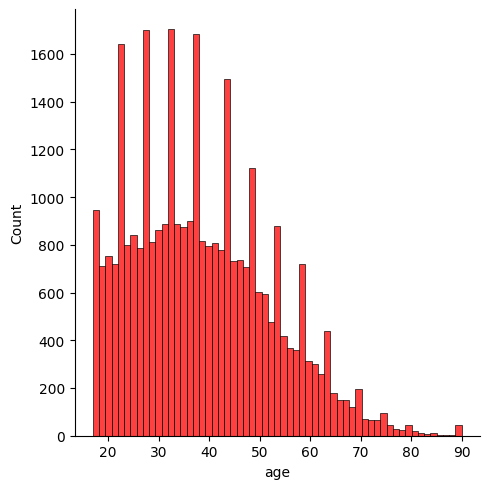

In [42]:
sns.displot(df['age'], color='red')
plt.show()

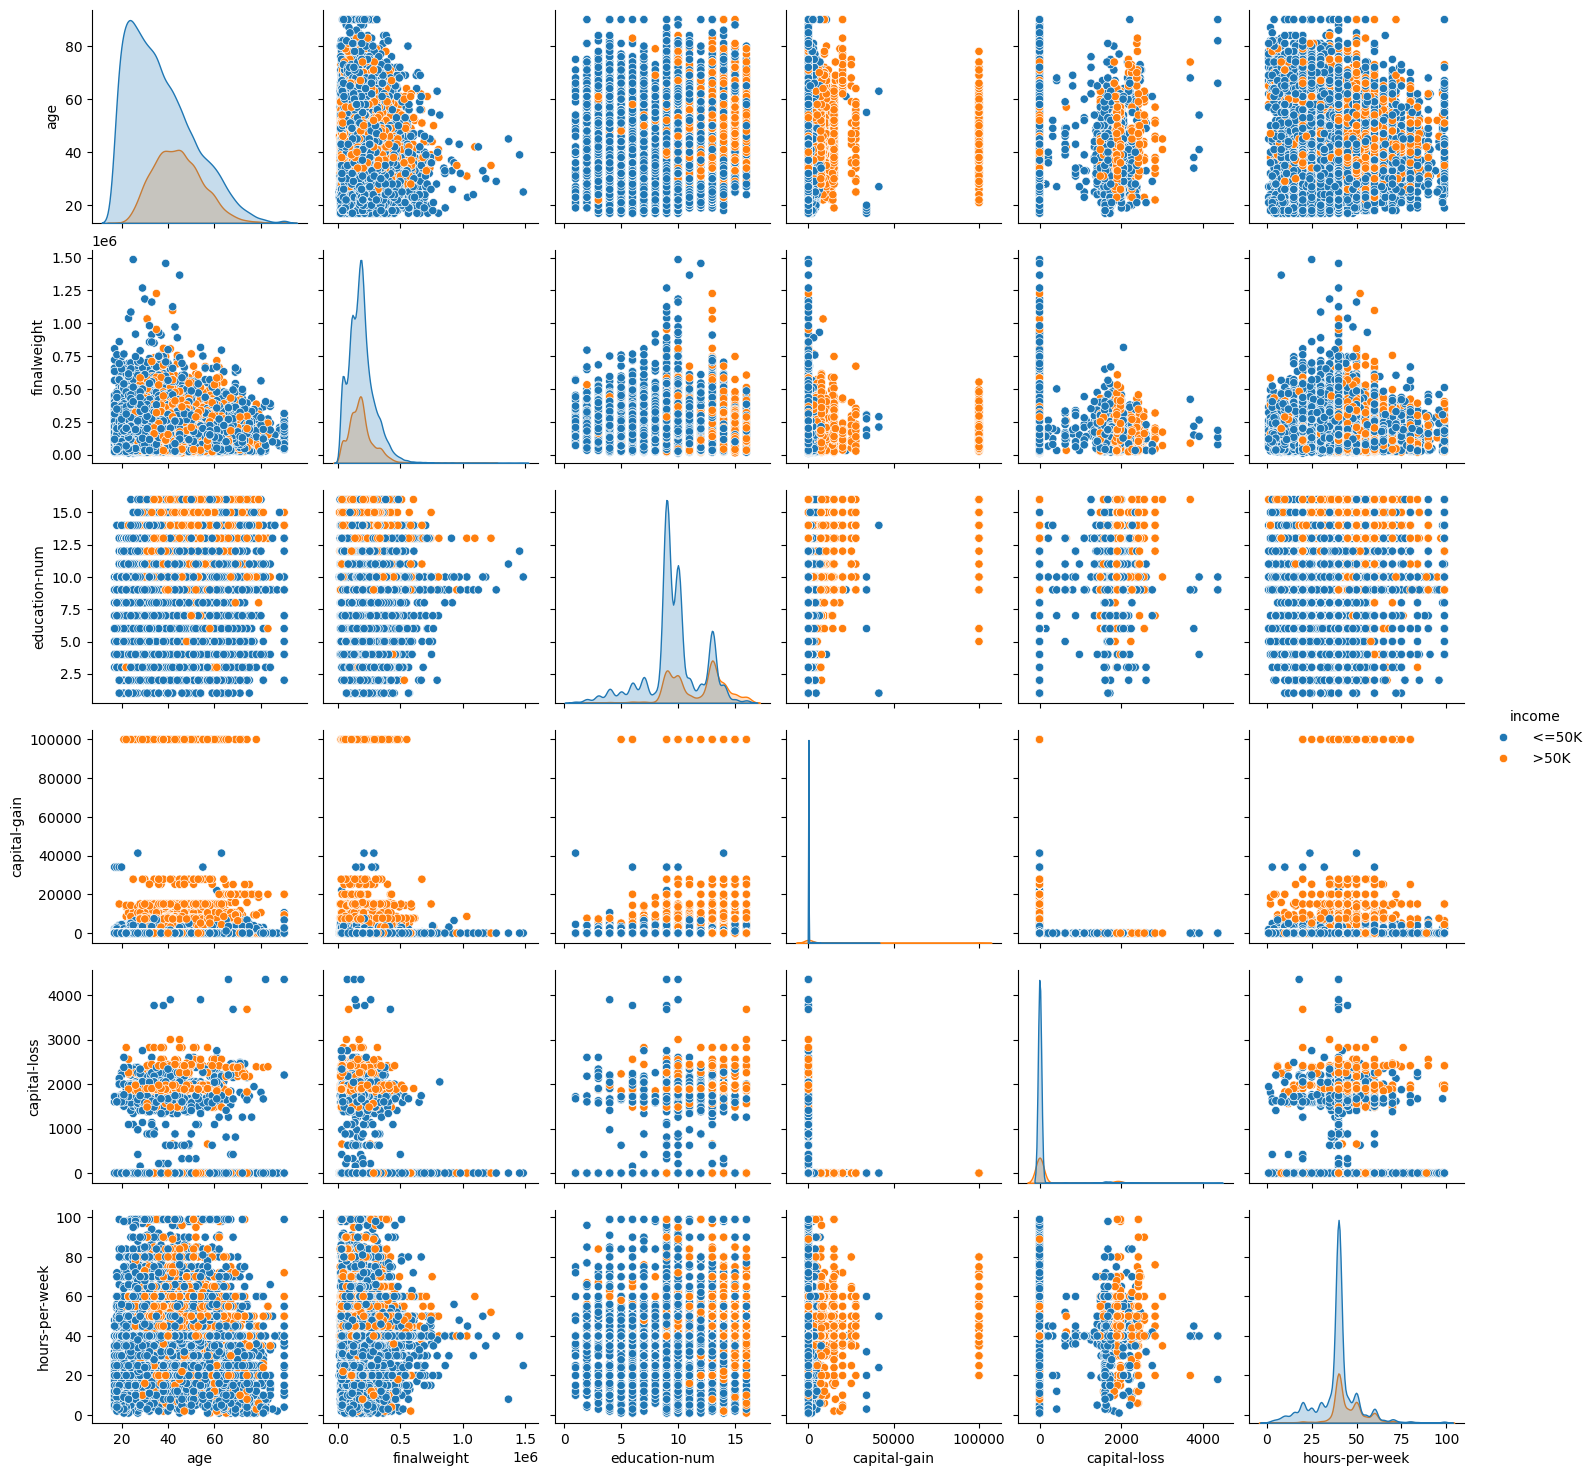

In [43]:
sns.pairplot(df, hue="income")
plt.show()

In [44]:
# Data Splitting

In [45]:
X = df.drop('income' ,axis=1)
y = df['income']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [47]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "O"]

In [48]:
X_train[categorical].isnull().sum()

workclass         1267
education            0
marital-status       0
occupation        1274
relationship         0
race                 0
sex                  0
native-country     405
dtype: int64

In [49]:
X_test[categorical].isnull().sum()

workclass         569
education           0
marital-status      0
occupation        569
relationship        0
race                0
sex                 0
native-country    178
dtype: int64

In [50]:
## Handling Missing Values

# Previously, we replaced "?" values with NaN.  
# Now, we fill these missing values in categorical features with their mode.  
# This prevents losing thousands of rows from the dataset.

In [51]:
for i in [X_train, X_test]:
    i['workclass'] = i['workclass'].fillna(X_train['workclass'].mode()[0])
    i['occupation'] = i['occupation'].fillna(X_train['occupation'].mode()[0])
    i['native-country'] = i['native-country'].fillna(X_train['native-country'].mode()[0])

In [52]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [53]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [54]:
## Encoding

In [55]:
X_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
19749,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Wife,White,Female,United-States
1216,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,United-States
27962,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
23077,Local-gov,HS-grad,Divorced,Exec-managerial,Not-in-family,White,Female,United-States
10180,Private,11th,Never-married,Priv-house-serv,Own-child,White,Female,United-States


In [56]:
df[categorical].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
dtype: int64

In [57]:
## Encoding and Target Definition

# The dataset contains a high-cardinality feature ("native-country") with 41 unique values.  
# Instead of applying One-Hot Encoding, we define our target variable as:  
# - "1" → income > 50K  
# - "0" → income <= 50K  

# This reduces complexity and keeps the model efficient.

In [58]:
y_train

19749     <=50K
1216       >50K
27962     <=50K
23077     <=50K
10180     <=50K
          ...  
29802     <=50K
5390      <=50K
860       <=50K
15795     <=50K
23654     <=50K
Name: income, Length: 22792, dtype: object

In [59]:
y_train_binary = y_train.apply(lambda x : 1 if x.strip() == '>50K' else 0)

In [60]:
y_train_binary

19749    0
1216     1
27962    0
23077    0
10180    0
        ..
29802    0
5390     0
860      0
15795    0
23654    0
Name: income, Length: 22792, dtype: int64

In [61]:
target_means = y_train_binary.groupby(X_train['native-country']).mean()

In [62]:
target_means

native-country
Cambodia                      0.357143
Canada                        0.321429
China                         0.192308
Columbia                      0.021739
Cuba                          0.246154
Dominican-Republic            0.039216
Ecuador                       0.050000
El-Salvador                   0.078947
England                       0.353846
France                        0.523810
Germany                       0.273684
Greece                        0.285714
Guatemala                     0.042553
Haiti                         0.093750
Holand-Netherlands            0.000000
Honduras                      0.000000
Hong                          0.454545
Hungary                       0.100000
India                         0.449275
Iran                          0.448276
Ireland                       0.222222
Italy                         0.360000
Jamaica                       0.160714
Japan                         0.425532
Laos                          0.083333
Mexico    

In [63]:
# ## Country-wise Income Analysis

# We calculated the mean income (binary target) for each country in the training set.  
# This shows which countries have a higher proportion of people earning more than 50K.

In [64]:
X_train['native-country-encoded'] = X_train['native-country'].map(target_means)
X_train['native-country-encoded'] = X_train['native-country-encoded'].fillna(y_train_binary.mean())

X_test['native-country-encoded'] = X_test['native-country'].map(target_means)
X_test['native-country-encoded'] = X_test['native-country-encoded'].fillna(y_train_binary.mean())

In [65]:
X_train.head()

,age,workclass,finalweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,native-country-encoded
19749,34,Self-emp-not-inc,56460,HS-grad,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States,0.248267
1216,48,Self-emp-not-inc,243631,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,7688,0,40,United-States,0.248267
27962,23,State-gov,56402,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,30,United-States,0.248267
23077,56,Local-gov,255406,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0.248267
10180,17,Private,297246,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States,0.248267


In [66]:
X_train = X_train.drop('native-country',axis=1)
X_test = X_test.drop('native-country',axis=1)

In [67]:
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [68]:
one_hot_categories = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [70]:
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown="ignore", sparse_output=False), one_hot_categories) # 1-) 'cat' ->  name , 2-) process , 3-) columns
    ], remainder="passthrough"
)

In [71]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [72]:
X_train_enc

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.17900000e+03, 1.20000000e+01, 2.48266564e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.48266564e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.00000000e+01, 2.48266564e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.00000000e+01, 2.48266564e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.40000000e+01, 2.48266564e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.00000000e+01, 2.48266564e-01]],
      shape=(22792, 65))

In [73]:
columns = encoder.get_feature_names_out()

In [74]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__marital-status_ Divorced',
       'cat__marital-status_ Married-AF-spouse',
       'cat__marital-status_ Married-civ-spouse',
       'cat__marital-status_ Married-spouse-absent',
       'cat__marital-status_ Never-mar

In [75]:
X_train = pd.DataFrame(X_train_enc, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns=columns, index=X_test.index)

In [76]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country-encoded
19749,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,34.0,56460.0,9.0,0.0,2179.0,12.0,0.248267
1216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,48.0,243631.0,10.0,7688.0,0.0,40.0,0.248267
27962,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,23.0,56402.0,10.0,0.0,0.0,30.0,0.248267
23077,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,56.0,255406.0,9.0,0.0,0.0,40.0,0.248267
10180,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,17.0,297246.0,7.0,0.0,0.0,9.0,0.248267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,47.0,359461.0,13.0,0.0,0.0,40.0,0.248267
5390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,31.0,147215.0,8.0,0.0,0.0,21.0,0.248267
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,18.0,216284.0,7.0,0.0,0.0,20.0,0.248267
15795,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,50.0,54261.0,9.0,0.0,0.0,84.0,0.248267


In [77]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country-encoded
14160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,160178.0,10.0,0.0,0.0,38.0,0.248267
27048,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,45.0,50567.0,9.0,0.0,0.0,40.0,0.248267
28868,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,29.0,185908.0,13.0,0.0,0.0,55.0,0.248267
5667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,30.0,190040.0,13.0,0.0,0.0,40.0,0.248267
7827,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,29.0,189346.0,10.0,2202.0,0.0,50.0,0.248267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32476,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,35.0,30673.0,8.0,0.0,0.0,84.0,0.248267
21100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,24.0,51973.0,13.0,0.0,0.0,20.0,0.248267
27131,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,24.0,442274.0,9.0,0.0,0.0,40.0,0.248267
25526,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,56.0,178353.0,10.0,0.0,0.0,40.0,0.248267


In [78]:
cols = X_train.columns

In [79]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [80]:
# we don't actually need scaling in dt algortihms but let's do it because we will introduce robust scaler
# robust scaler is different than standardscaler and it is designed to handle outliers.

In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# we don't have to convert X_train into df again, we can just give it as a numpy array to model but 
# if we want to use column names again later it will come in handy

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [83]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__native-country-encoded
0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.15,-1.018859,-0.333333,0.0,2179.0,-5.6,0.0
1,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.55,0.547177,0.000000,7688.0,0.0,0.0,0.0
2,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.70,-1.019344,0.000000,0.0,0.0,-2.0,0.0
3,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.95,0.645697,-0.333333,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-1.0,-1.00,0.995766,-1.000000,0.0,0.0,-6.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.50,1.516311,1.000000,0.0,0.0,0.0,0.0
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.30,-0.259524,-0.666667,0.0,0.0,-3.8,0.0
22789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-1.0,-0.95,0.318368,-1.000000,0.0,0.0,-4.0,0.0
22790,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.65,-1.037258,-0.333333,0.0,0.0,8.8,0.0


In [84]:
# Training

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42)

In [86]:
rfc.fit(X_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
y_pred = rfc.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("confusion_matrix: \n", confusion_matrix(y_test,y_pred))

accuracy_score:  0.8461459719520934
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7455
        >50K       0.72      0.58      0.64      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

confusion_matrix: 
 [[6924  531]
 [ 972 1342]]


In [90]:
# let's try to see feature importance

In [91]:
rfc.feature_importances_

array([5.89061232e-03, 6.04086340e-03, 0.00000000e+00, 1.07409388e-02,
       6.19945195e-03, 7.60953215e-03, 4.51872275e-03, 1.50655654e-04,
       1.16067143e-03, 1.39834412e-03, 6.30398348e-04, 2.11769043e-04,
       2.64291374e-04, 1.59974838e-03, 8.65651300e-04, 2.19859429e-03,
       2.92353222e-03, 1.87829114e-02, 4.11316094e-03, 7.07843149e-03,
       6.90574797e-03, 3.10646959e-05, 8.62902717e-03, 4.06049324e-03,
       7.84364306e-03, 5.61750797e-04, 9.95060594e-02, 4.39150913e-04,
       2.46296379e-02, 2.53157493e-03, 1.17612953e-03, 5.82133807e-03,
       8.90561746e-06, 7.32294438e-03, 1.51743737e-02, 4.67548351e-03,
       3.94984000e-03, 4.31310759e-03, 5.62353466e-03, 7.61724482e-05,
       1.12181542e-02, 2.87541392e-03, 7.81537231e-03, 4.97962071e-03,
       4.31737473e-03, 4.49531536e-02, 7.31545261e-03, 1.33974998e-03,
       1.94003713e-03, 2.15332595e-03, 9.26529594e-03, 1.06673648e-03,
       3.20401151e-03, 4.76622522e-03, 8.41255837e-04, 7.07190632e-03,
      

In [92]:
feature_scores = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending=False)

In [93]:
feature_scores

remainder__finalweight                     0.155903
remainder__age                             0.139542
cat__marital-status_ Married-civ-spouse    0.099506
remainder__capital-gain                    0.096203
remainder__hours-per-week                  0.080594
                                             ...   
cat__workclass_ Without-pay                0.000151
cat__occupation_ Priv-house-serv           0.000076
cat__education_ Preschool                  0.000031
cat__occupation_ Armed-Forces              0.000009
cat__workclass_ Never-worked               0.000000
Length: 65, dtype: float64

In [94]:
feature_scores.tail(10)

cat__education_ 12th                          0.000630
cat__marital-status_ Married-AF-spouse        0.000562
cat__marital-status_ Married-spouse-absent    0.000439
cat__education_ 5th-6th                       0.000264
cat__education_ 1st-4th                       0.000212
cat__workclass_ Without-pay                   0.000151
cat__occupation_ Priv-house-serv              0.000076
cat__education_ Preschool                     0.000031
cat__occupation_ Armed-Forces                 0.000009
cat__workclass_ Never-worked                  0.000000
dtype: float64

In [95]:
# drop the least important 10 columns from train, test and try again
# generally you do not need to do this manually but if you think you somehow made too many columns with encoding
# it's worth a try

In [96]:
X_train = X_train.drop(["cat__education_ 12th","cat__marital-status_ Married-AF-spouse","cat__marital-status_ Married-spouse-absent",
                        "cat__education_ 5th-6th","cat__education_ 1st-4th","cat__workclass_ Without-pay","cat__occupation_ Priv-house-serv",
                        "cat__education_ Preschool","cat__occupation_ Armed-Forces","cat__workclass_ Never-worked"
                       ], axis=1)

In [97]:
X_test = X_test.drop(["cat__education_ 12th","cat__marital-status_ Married-AF-spouse","cat__marital-status_ Married-spouse-absent",
                        "cat__education_ 5th-6th","cat__education_ 1st-4th","cat__workclass_ Without-pay","cat__occupation_ Priv-house-serv",
                        "cat__education_ Preschool","cat__occupation_ Armed-Forces","cat__workclass_ Never-worked"
                       ], axis=1)

In [98]:
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("confusion_matrix: \n", confusion_matrix(y_test,y_pred))

accuracy_score:  0.8461459719520934
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7455
        >50K       0.72      0.58      0.64      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

confusion_matrix: 
 [[6924  531]
 [ 972 1342]]


In [99]:
# We removed 10 features with low importance values.  
# The accuracy did not change significantly, indicating that these features had little or no impact on the model’s performance.

In [100]:
## Hyperparameter tuning

In [101]:
rf_params = {
    "n_estimators": [100,200,500,1000],
    "max_depth": [5,8,10,15,None],
    "max_features": ["sqrt", "log2", 5,6,7,8],
    "min_samples_split": [2, 8, 15, 20]
}

In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
rfc = RandomForestClassifier()

In [104]:
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params, cv=3, n_jobs=-1)
rscv.fit(X_train,y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [5, 8, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_split': [2, 8, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [105]:
y_pred = rscv.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("confusion_matrix: \n", confusion_matrix(y_test,y_pred))

accuracy_score:  0.8623195823523391
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7455
        >50K       0.78      0.58      0.67      2314

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769

confusion_matrix: 
 [[7073  382]
 [ 963 1351]]


In [106]:
# accuracy: 0.8461 ----> 0.8652

In [107]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'max_features': 8,
 'max_depth': 15}